# Distributional Analysis

Distributional analysis is a term I coined for a very simple yet powerful way of analyzing datasets. It means that you think of the dataset as a distribution within a large multidimensional space, which you then can examine through its marginal statistics in any two-dimensional subspace.

This is my favorite tool for exploratory data analysis&mdash;meaning you don't know what you're looking for just yet, you're simply getting to know the data.  The best way to understand this is through examples. So let's turn our attention to one of my favorite datasets, the global surface drifter dataset. 

Surface instruments record latitude and longitude&mdash;and therefore horizontal velocity&mdash;as well as, sometimes, temperature as they drift following the ocean currents. We're using this classic dataset:

*Lumpkin, Rick; Centurioni, Luca (2019). Global Drifter Program quality-controlled 6-hour interpolated data from ocean surface drifting buoys.  NOAA National Centers for Environmental Information. Dataset. [https://doi.org/10.25921/7ntx-z961](https://doi.org/10.25921/7ntx-z961).*

If you want to run this lab yourself, as opposed to simply viewing it, you'll need to grab the single NetCDF file version of this dataset. That file is currently called `gdp_jul22_ragged_6h.nc` and can be downloaded from [here](https://www.aoml.noaa.gov/ftp/pub/phod/buoydata/gdp_jul22_ragged_6h.nc). 


This notebook requires my [jlab](http://www.jmlilly.net/software.html) toolbox to be installed.  You will also need to have set up Jupyter Lab to work with Matlab, following [these instructions](http://www.jmlilly.net/jupyter-matlab).

In [1]:
%load in hourly drifter dataset

tic %timing the script 

%you may need to uncomment these lines if Jupyter is not finding jLab
%addpath  /Users/lilly/Desktop/DropBox/Matlab/jlab
%jlab_addpath

set(groot,'defaultfigurepaperposition',[0 0 12 5]) %set default figure size
set(0,'DefaultFigureColormap',lansey);%set default colormap
datadir = '/Users/lilly/Desktop/Dropbox/NetCDF/';  %path to the directory where you've put the data
ncload([datadir 'gdp_jul22_ragged_6h.nc'])
drifters = gdp_jul22_ragged_6h;
clear gdp_jul22_ragged_6h
drifters

lon=drifters.lon;
lat=drifters.lat;
u=drifters.ve*100;
v=drifters.vn*100;
sst=drifters.temp;

%for making the colorbar a little thinner
tweakcolorbar=['pos=get(gca,''position'');'...
    'cpos=get(hc,''position'');'...
    'set(hc,''position'',[cpos(1) cpos(2) cpos(3)/2 cpos(4)]);'...
    'set(gca,''position'',pos)'];

set(0,'defaultaxesfontsize',8)
set(0,'defaulttextfontsize',8)

drifters = struct with fields:
   ID: [26843x1 double]
                  rowsize: [26843x1 double]
                      WMO: [26843x1 double]
                    expno: [26843x1 double]
              deploy_date: [26843x1 double]
               deploy_lat: [26843x1 double]
               deploy_lon: [26843x1 double]
                 end_date: [26843x1 double]
                  end_lat: [26843x1 double]
                  end_lon: [26843x1 double]
         drogue_lost_date: [26843x1 double]
                typedeath: [26843x1 double]
                 typebuoy: [10x26843 char]
            DeployingShip: [20x26843 char]
         DeploymentStatus: [20x26843 char]
     BuoyTypeManufacturer: [20x26843 char]
      BuoyTypeSensorArray: [20x26843 char]
           CurrentProgram: [26843x1 double]
         PurchaserFunding: [20x26843 char]
            SensorUpgrade: [20x26843 char]
            Transmissions: [20x26843 char]
         DeployingCountry: [20x26843 char]
       DeploymentComments: [20x26843 char]
          ManufactureYear: [26843x1 double]
         ManufactureMonth: [26843x1 double]
    ManufactureSensorType: [20x26843 char]
       ManufactureVoltage: [26843x1 double]
            FloatDiameter: [26843x1 double]
      SubsfcFloatPresence: [26843x1 double]
               DrogueType: [7x26843 char]
             DrogueLength: [26843x1 double]
            DrogueBallast: [26843x1 double]
      DragAreaAboveDrogue: [26843x1 double]
         DragAreaOfDrogue: [26843x1 double]
            DragAreaRatio: [26843x1 double]
        DrogueCenterDepth: [26843x1 double]
       DrogueDetectSensor: [20x26843 char]
                       ve: [44544647x1 double]
                       vn: [44544647x1 double]
                     temp: [44544647x1 double]
                  err_lat: [44544647x1 double]
                  err_lon: [44544647x1 double]
                 err_temp: [44544647x1 double]
            drogue_status: [44544647x1 double]
                      ids: [44544647x1 double]
                     time: [44544647x1 double]
                      lon: [44544647x1 double]
                      lat: [44544647x1 double]

## Exploring the Drifter Dataset

Let's make a basic plot of the drifter dataset.  First we will loop over all of the trajectories in order to plot each trajectory with a different color.

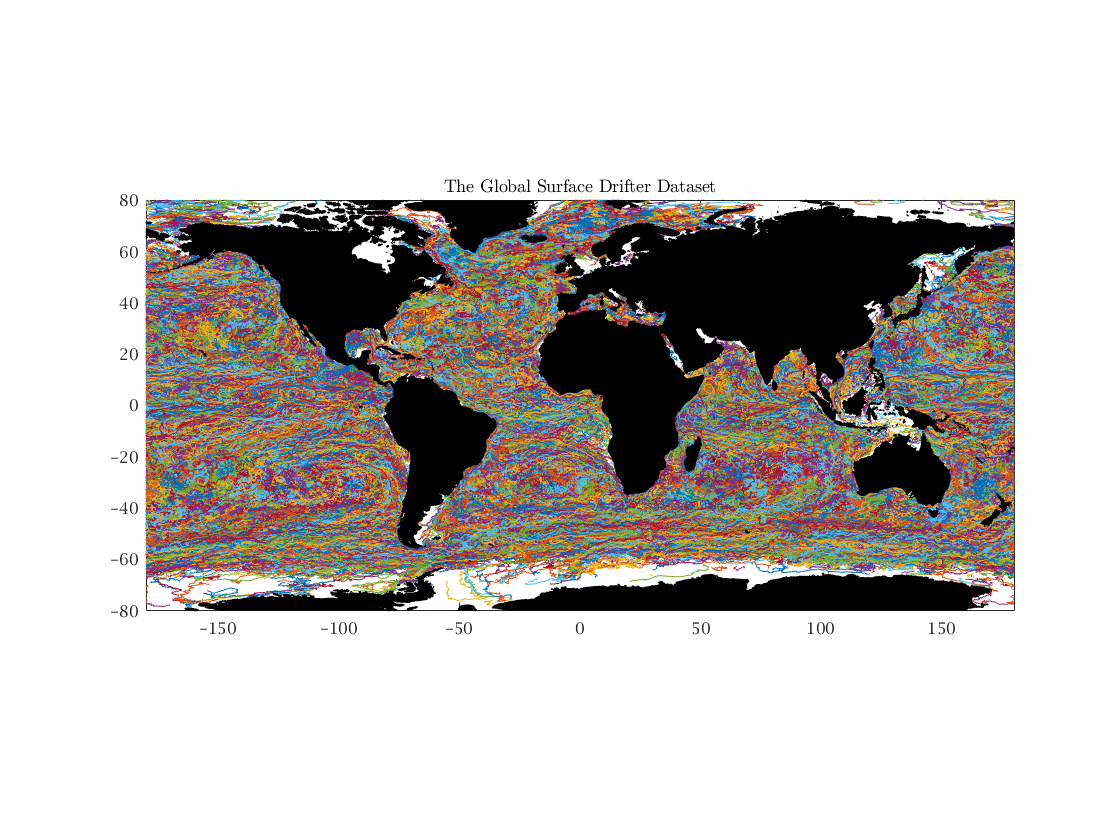

In [2]:
%insert NaNs at id breaks, for plotting purposes
[~,lat_nans,lon_nans]=colbreaks(drifters.ids,lat,lon);
col2cell(lat_nans,lon_nans); %convert NaN-separated column vectors to cell arrays
cellplot(180,lon_nans,lat_nans);axis tight
axis([-180 180 -80 80])
topoplot continents,latratio(20)
title('The Global Surface Drifter Dataset')
clear lat_nans lon_nans %clear these temporary variables

## Two-Dimensional Histograms

However, this doesn't tell us much quantitatively. To go further we're going to start exploring this dataset as a distribution.  The first step is to plot the two dimensional histogram of observation locations in latitude&ndash;longitude space.

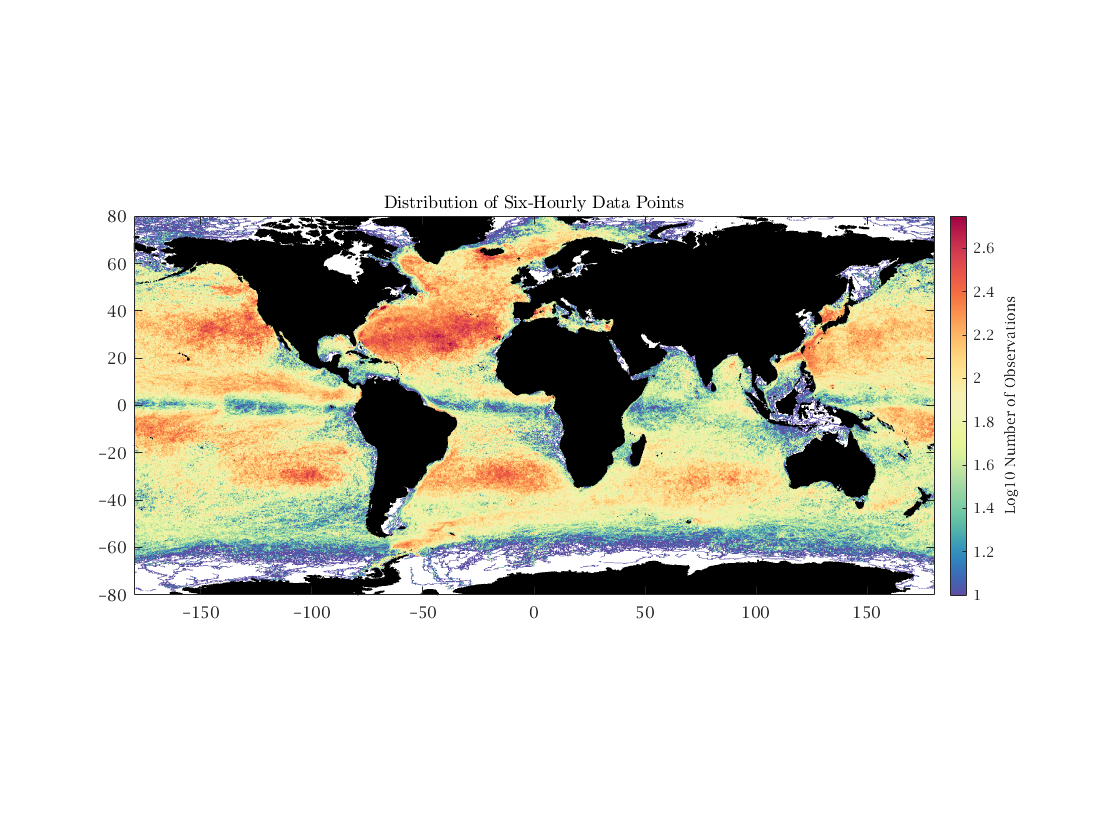

In [3]:
[mat,xmid,ymid]=twodhist(lon,lat,[-180:1/4:180],[-80:1/4:80]);
jpcolor(xmid,ymid,log10(mat))
caxis([1 2.75]),hc=colorbar;
axis([-180 180 -80 80])
topoplot continents,latratio(20)
hc.Label.String='Log10 Number of Observations';
title('Distribution of Six-Hourly Data Points')
eval(tweakcolorbar)

We see that the observation density is high in the central gyres, particularly in the North Atlantic, and is low in the Arctic, Antarctic, upwelling zones, and shallow seas.  

Let's take a look now at the distribution in time.  For this, it will be useful to use latitude as one axis and time as the other. 

In [4]:
%missing figure relative to Julia version sorry

We see that there is much interannual variability of the data distribution, but little annual variability.  This is  good news, because it means aliasing of the annual cycle, which we expect to be stronger than the interannual variability in this case, won't impact the mean statistics. 

## Two-Dimensional Means and Standard Deviations

It's very useful to also examine basic statistics as a function of two parameters.  The most obvious choices for the axes of such two-dimensional statistics in this case would again be latitude and longitude. 

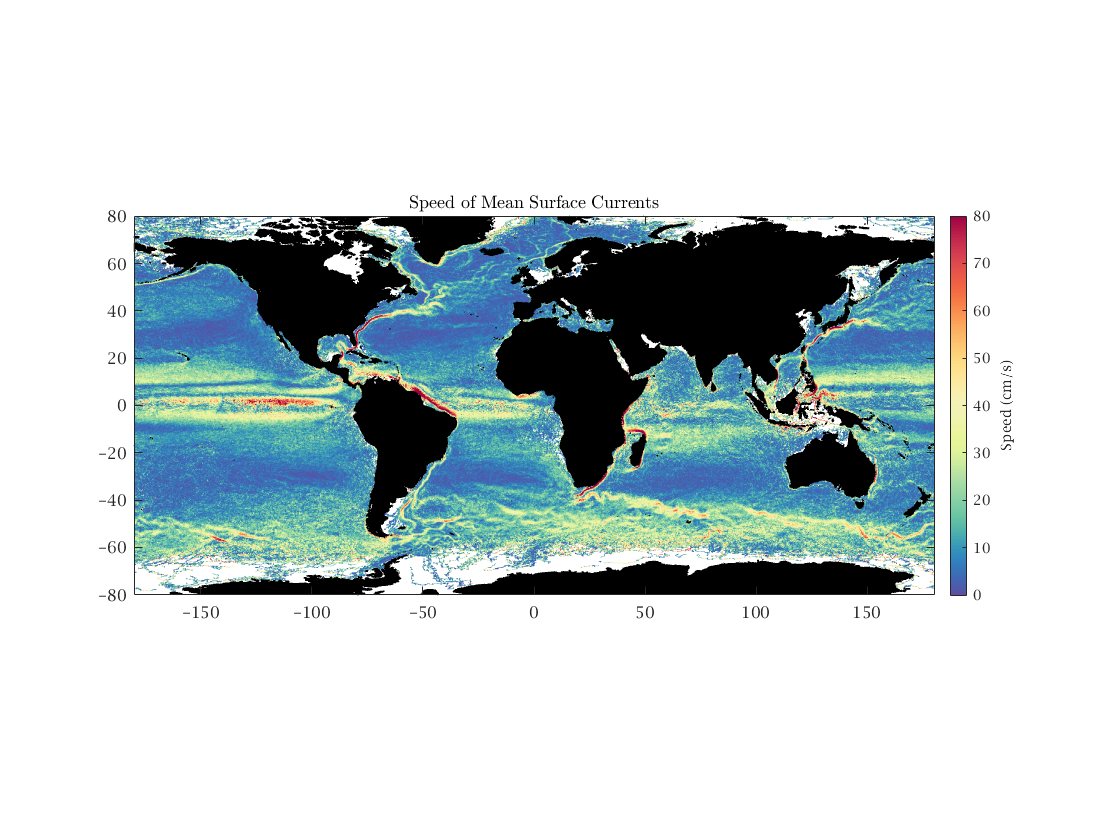

In [5]:
%Now let's look at two-dimensional statitistics, starting with the speed of the mean flow
[meanu,xmid,ymid]=twodstats(lon,lat,u,[-180:1/4:180],[-80:1/4:80]);
[meanv,xmid,ymid]=twodstats(lon,lat,v,[-180:1/4:180],[-80:1/4:80]);
jpcolor(xmid,ymid,sqrt(meanu.^2+meanv.^2))
caxis([0 80]),hc=colorbar;
axis([-180 180 -80 80])
topoplot continents,latratio(20)
hc.Label.String='Speed (cm/s)';
title('Speed of Mean Surface Currents')
eval(tweakcolorbar)

We see the major current systems as thin ribbons: the Gulf Stream, the Kuroshio, the Brazil Current, the Agulhas Current, the equatorial current system, and so forth. 

A slightly different quantity is the mean of the current speed, rather than the speed or magnitude of the mean flow. 

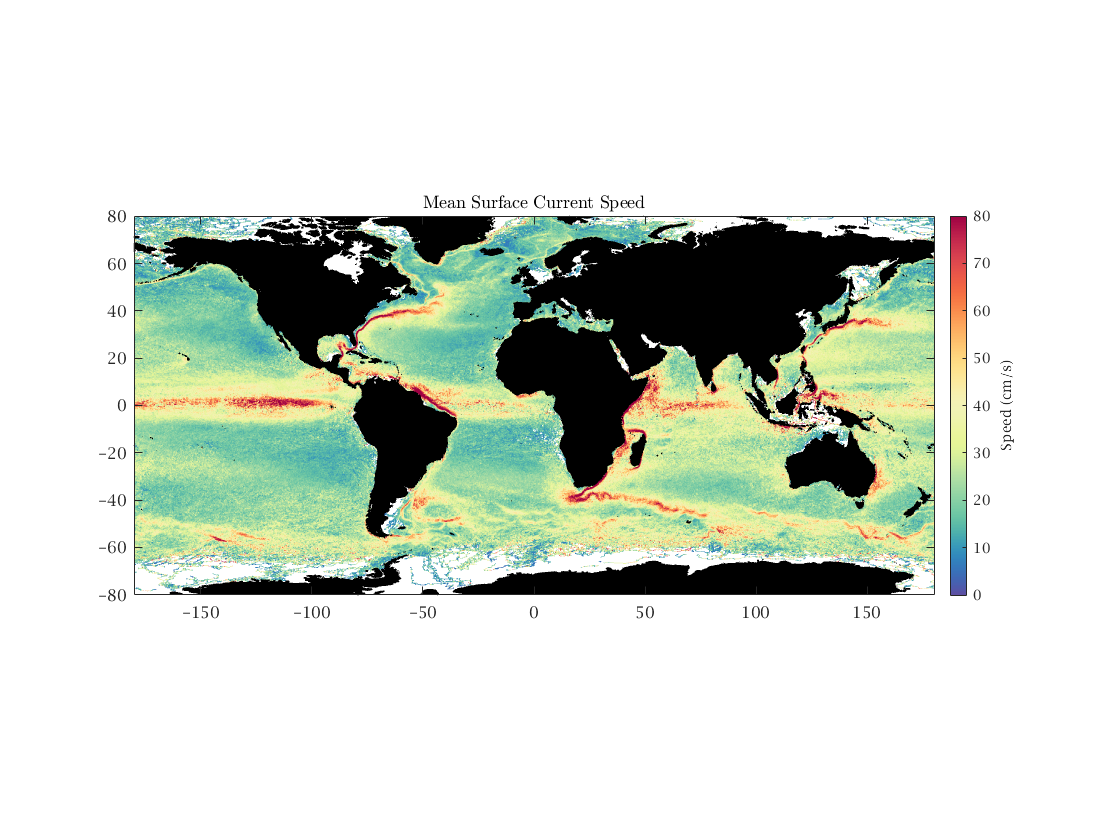

In [6]:
%The mean of the speed
[mat,xmid,ymid]=twodstats(lon,lat,abs(u+1i.*v),[-180:1/4:180],[-80:1/4:80]);
jpcolor(xmid,ymid,mat)
caxis([0 80]),hc=colorbar;
axis([-180 180 -80 80])
topoplot continents,latratio(20)
hc.Label.String='Speed (cm/s)';
title('Mean Surface Current Speed')
eval(tweakcolorbar)

The mean speed paints the currents as slightly broader ribbons, because now the magnitude is not decreased by the variability of a current's direction.  

A measure of the variability is the velocity standard deviation, which we look at next. 

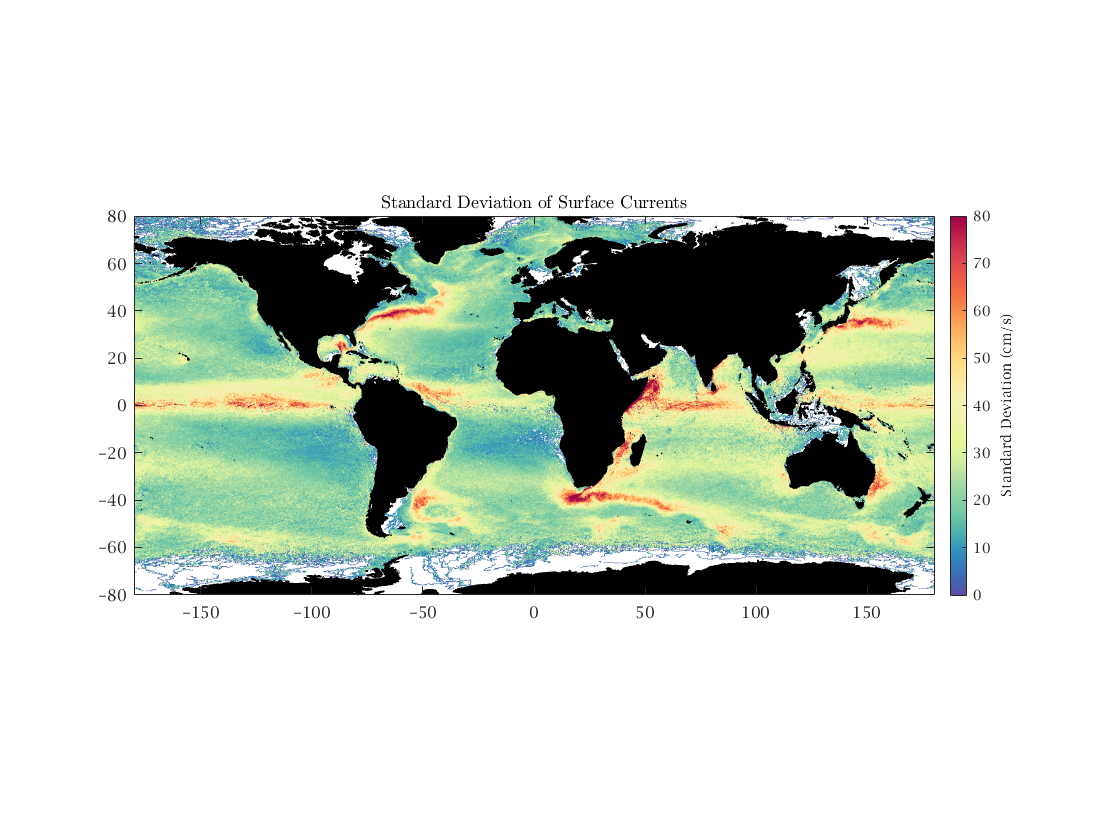

In [13]:
%Standard deviation
[~,xmid,ymid,~,mat]=twodstats(lon,lat,u+1i.*v,[-180:1/4:180],[-80:1/4:80]);
jpcolor(xmid,ymid,mat)
caxis([0 80]),hc=colorbar;
axis([-180 180 -80 80])
topoplot continents,latratio(20)
hc.Label.String='Standard Deviation (cm/s)';
title('Standard Deviation of Surface Currents')
eval(tweakcolorbar)

To see how these compare we can examine the coefficient of variation, defined as the ratio of the standard devation to the mean.  This is a nondimensional quantity showing the *relative* magnitude of variability. The larger the coefficient of variation, the larger typical deviations from the mean are with respect to the mean itself.

Note that the coefficient of variation is only meaningful when there is a true zero, that is for quantities like speed, height, amount of precipitation or radiation, etc.  Such data is called *ratio data* in statistics.  One would not use it for, say, temperature, because while 0 K is well defined, it is not a meaningful reference zero for typical planetary processes.

For plotting the coefficient of variation, it is useful to take the log, as this has the nice property that log(1/a)=-log(a). 

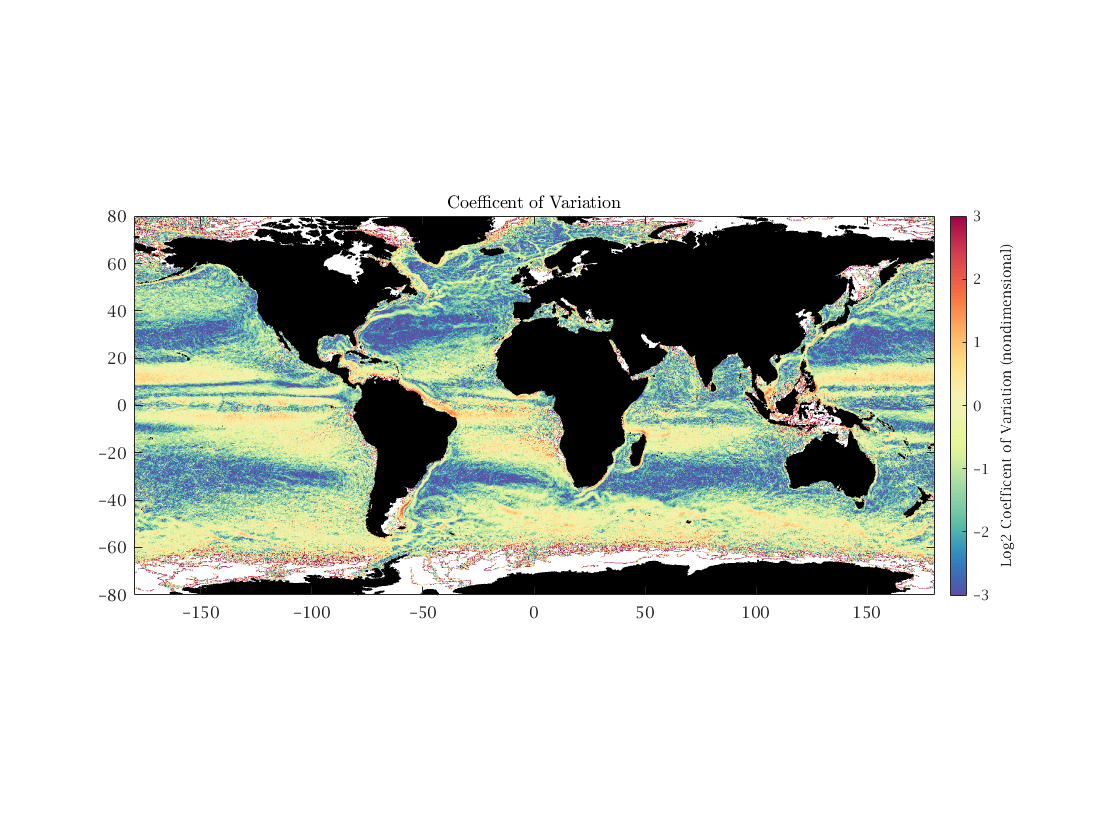

In [14]:
%coefficient of variation
[meanu,xmid,ymid]=twodstats(lon,lat,u,[-180:1/4:180],[-80:1/4:80]);
[meanv,xmid,ymid]=twodstats(lon,lat,v,[-180:1/4:180],[-80:1/4:80]);
numer=sqrt(meanu.^2+meanv.^2);
[~,xmid,ymid,~,denom]=twodstats(lon,lat,u+1i.*v,[-180:1/4:180],[-80:1/4:80]);
jpcolor(xmid,ymid,log2(numer./denom))
caxis([-3 3]),hc=colorbar;
axis([-180 180 -80 80])
topoplot continents,latratio(20)
hc.Label.String='Log2 Coefficent of Variation (nondimensional)';
title('Coefficent of Variation')
eval(tweakcolorbar)

Let's change now to another quantity, the sea surface temperature.  

However, note that the number of data points involved for which the temperature is measured is considerably smaller than the total.  Thus, if we were going to look further at this, we would also want to redo the data distributions we presented earlier, showing only the number of data points for which sea surface temperature is not NaN.

For expediency, we will skip this step and go straight to the two-dimensional statistics. 

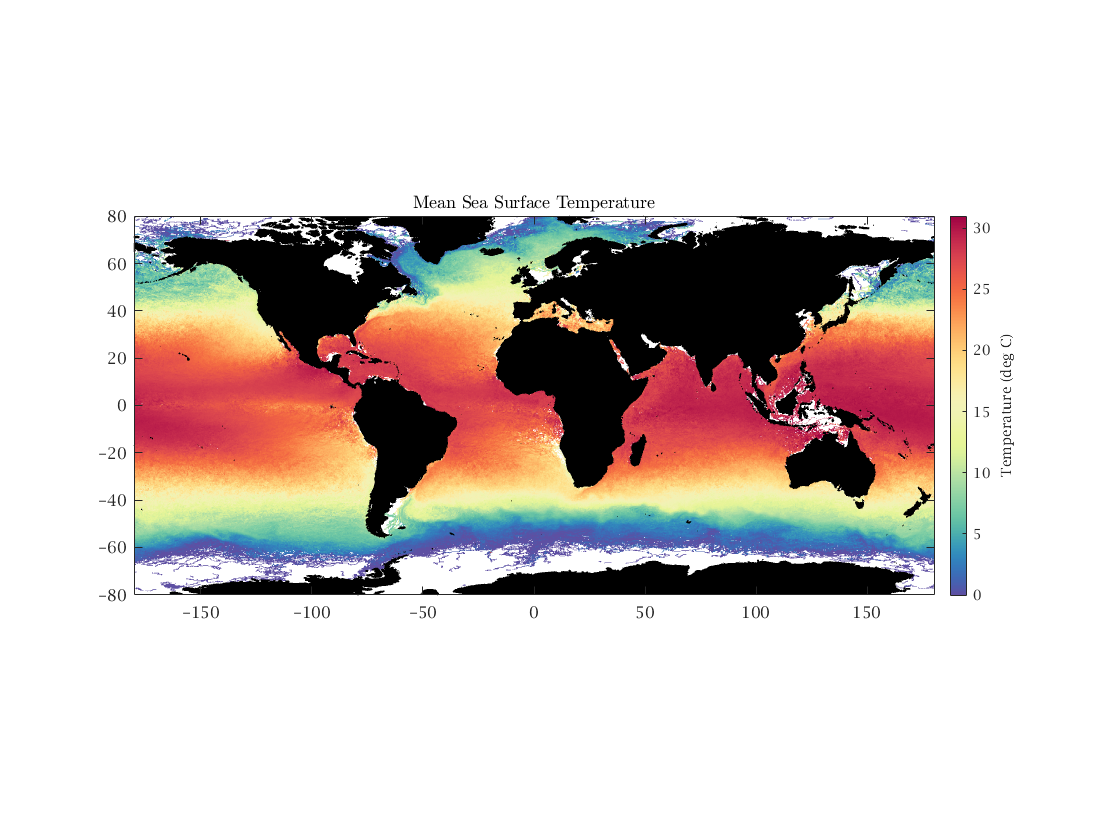

In [9]:
%mean sea surface temperature
[mat,xmid,ymid]=twodstats(lon,lat,sst,[-180:1/4:180],[-80:1/4:80]);
jpcolor(xmid,ymid,mat)
caxis([0 31]),hc=colorbar;
axis([-180 180 -80 80])
topoplot continents,latratio(20)
hc.Label.String='Temperature (deg C)';
title('Mean Sea Surface Temperature')
eval(tweakcolorbar)

Note the multi-scale structure present here: global, regional, and small-scale or mesoscale.  

The large-scale temperature gradient is dominating the picture, obscuring the other variability.  To account for this, we can subtract the longitudinally-averaged temperature at each latitude.  This forms the temperature deviation from the zonal average.    

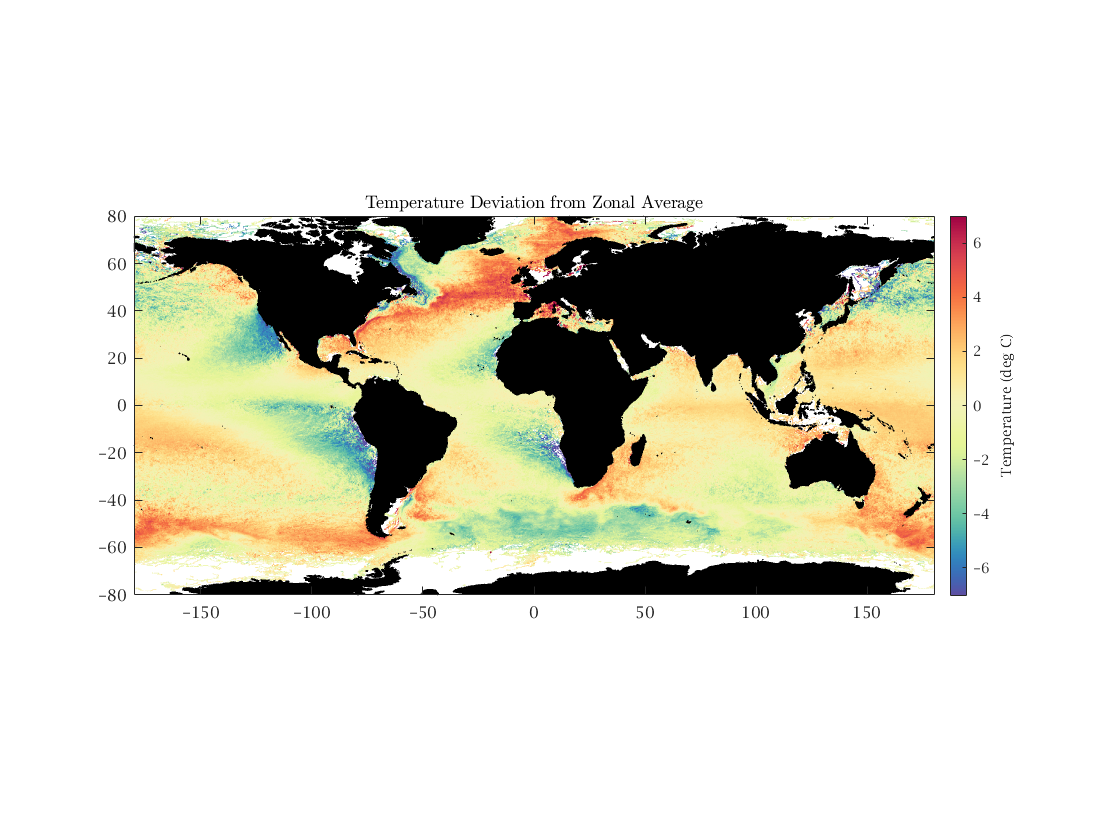

In [10]:
%temperature deviation from zonal average
[mat,xmid,ymid]=twodstats(lon,lat,sst,[-180:1/4:180],[-80:1/4:80]);
jpcolor(xmid,ymid,mat-vmean(mat,2))
caxis([-7 7]),hc=colorbar;
axis([-180 180 -80 80])
topoplot continents,latratio(20)
hc.Label.String='Temperature (deg C)';
title('Temperature Deviation from Zonal Average')
eval(tweakcolorbar)

We see that subtracting the zonal mean reveals smaller-scale structures. We now see more clearly that generally speaking, it's colder on the eastern side than on the western sides of ocean basins. 

Finally we look at the sea surface temperature standard deviation.

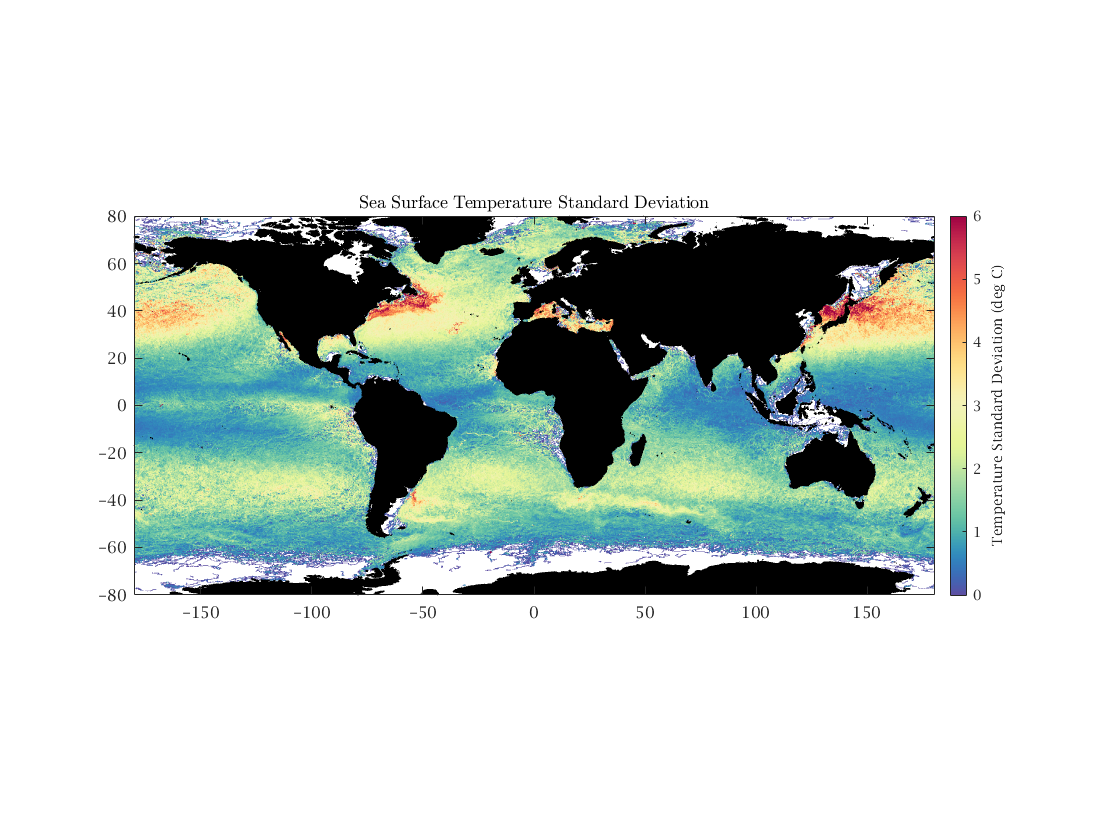

In [11]:
%sea surface temperature standard deviation
[~,xmid,ymid,~,mat]=twodstats(lon,lat,sst,[-180:1/4:180],[-80:1/4:80]);
jpcolor(xmid,ymid,mat)
caxis([0 6]),hc=colorbar;
axis([-180 180 -80 80])
topoplot continents,latratio(20)
hc.Label.String='Temperature Standard Deviation (deg C)';
title('Sea Surface Temperature Standard Deviation')
eval(tweakcolorbar)

This shows a remarkably strong asymmetry between the northern and southern hemispheres.  

Regions of the highest mean sea surface temperature&mdash;such as the tropical warm pools&mdash;and also regions of the lowest mean sea surface temperature&mdash;the polar regions&mdash; are both regions of notably low temperature variability.

The regions of highest tempertature variability are the eddying or high velocity variance regions of the northern subtropical western boundary currents, specifically the Gulf Stream and Kuroshio, as well as relatively shallow seas such as the Sea of Okhotsk and the Black Sea.

## Distributions and Statistics in Non-Spatial Dimensions

For a while now we been looking at the statistics in latitude&ndash;longitude space.  However, there are many other perspectives from which we could view this data.  Let's start by returning to temperature and trying another way to examine the large-scale gradient. 

XXX working on translating below here from Julia sorry 

In [12]:
toc

Elapsed time is 122.810066 seconds.
